In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\batch -3\Machine learning project\Project 24 COVID-19 Prediction\Cleaned-Data-No-Country.csv')
df.shape

(316800, 26)

In [3]:
print(df.columns)


Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')


In [4]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

In [6]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [7]:
x = df.drop(columns=['Severity_Severe'])

y = df['Severity_Severe']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
print(xtrain.shape, x.shape, xtest.shape)

(253440, 25) (316800, 25) (63360, 25)


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=5,  # Maximum depth of trees
    n_jobs=-1,  # Use all cores
    random_state=42
)
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [12]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9762863005050505


In [13]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9750631313131313


In [14]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
# Evaluate the model
conf_matrix = confusion_matrix(ytest, xtest_prediction)
class_report = classification_report(ytest, xtest_prediction)
print("\nClassification Report:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Classification Report:
 [[47498     0]
 [ 1580 14282]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     47498
           1       1.00      0.90      0.95     15862

    accuracy                           0.98     63360
   macro avg       0.98      0.95      0.97     63360
weighted avg       0.98      0.98      0.97     63360



In [16]:
import numpy as np
input_data = (48,70,1.005,4,0,0,0,0,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,0,0,0,0,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is affected by Covid_19')

else:
  print('The person is not affected by Covid_19')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 24 features, but RandomForestClassifier is expecting 25 features as input.

In [ ]:
import pickle


filename = 'Covid_19 prediction.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open('Covid_19 prediction.sav', 'rb'))

for column in df.columns:
    print(column)

Fever
Tiredness
Dry-Cough
Difficulty-in-Breathing
Sore-Throat
None_Sympton
Pains
Nasal-Congestion
Runny-Nose
Diarrhea
None_Experiencing
Age_0-9
Age_10-19
Age_20-24
Age_25-59
Age_60+
Gender_Female
Gender_Male
Gender_Transgender
Severity_Mild
Severity_Moderate
Severity_None
Severity_Severe
Contact_Dont-Know
Contact_No
Contact_Yes


In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='linear')

#training the support vector Machine Classifie
classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [ ]:
# accuracy score on the test data
xtest_prediction = classifier.predict(xtest)
test_data_accuracy = accuracy_score(ytest,xtest_prediction )
print('Accuracy score on the test data :', test_data_accuracy)

Accuracy score on the test data : 1.0


In [ ]:
# Classification Report
print("\nSVM Classification Report:\n", classification_report(ytest,xtest_prediction ))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47498
           1       1.00      1.00      1.00     15862

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



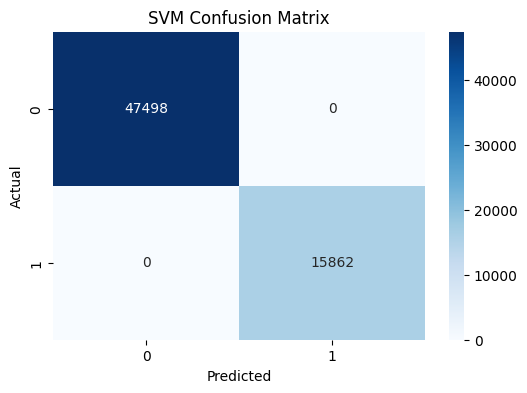

In [ ]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, xtest_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Import ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
### 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 1.0


In [ ]:
### 2. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(dt_pred,ytest ))

Decision Tree Accuracy: 1.0


In [ ]:
### 3. Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
print("Random Forest Accuracy:", accuracy_score( rf_pred,ytest))

Random Forest Accuracy: 1.0


In [ ]:
### 4. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
print("XGBoost Accuracy:", accuracy_score(ytest, xgb_pred))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.0


In [ ]:
### 5. Artificial Neural Network (ANN)
model = Sequential([
    Dense(16, activation='relu', input_shape=(xtrain.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=50, batch_size=5, verbose=0)

# Evaluate ANN
ann_pred = np.argmax(model.predict(xtest), axis=1)
print("ANN Accuracy:", accuracy_score(ytest, ann_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain, ytrain)
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
logs = LogisticRegression()
logs.fit(xtrain,ytrain)
y_pre = logs.predict(xtest)
accuracy = accuracy_score(ytest,y_pre)
accuracy

1.0

In [17]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  1.0


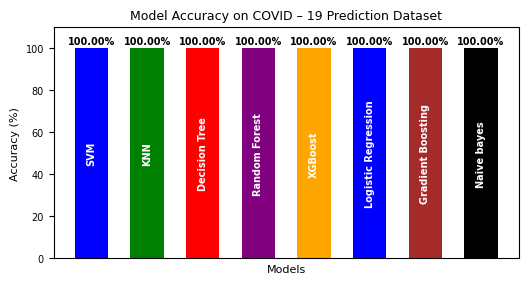

In [2]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [100, 100, 100, 100, 100, 100, 100,100]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'blue', 'brown','black'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on COVID – 19 Prediction Dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()